In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [2]:
# lire les fichiers excel
erp=pd.read_excel("Fichier_erp.xlsx")
liaison=pd.read_excel("fichier_liaison.xlsx")
web=pd.read_excel("Fichier_web.xlsx")

C:\Users\ghait\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\ghait\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


# Découvrir le fichier ERP

In [3]:
# Affichage les données dans ce fichier
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
#découvrir le type des données d'erp
erp.dtypes


product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [5]:
# vérification s'il y a des doublons dans la colonnes "product-id"
erp["product_id"].is_unique

True

In [6]:
# Assurer la validité des donnés dans l'ensemble des colonnes et la possibilité d'avoir des valeurs vides
erp["product_id"].isnull().sum(),
erp["onsale_web"].isnull().sum(),
erp["price"].isnull().sum(),
erp["stock_quantity"].isnull().sum(),
erp["stock_status"].isnull().sum()

0

In [7]:
#un résumé statistique des données numériques contenues dans ce DataFrame
erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.384000,26.583030
std,902.644635,0.337506,26.832271,45.875948
min,3847.000000,0.000000,-8.000000,-1.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


## Découvrir le fichier Liaison

In [8]:
# affichage le fichier liaison
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [9]:
liaison.dtypes

product_id     int64
id_web        object
dtype: object

In [10]:
#Vérification s'il y a de doublons ou pas dans la colonne "product_id"
liaison["product_id"].is_unique

True

In [11]:
#Vérification s'il y a de doublons ou pas dans la colonne "id_web"
liaison["id_web"].is_unique

False

In [12]:
#somme des doublons dans la colonne "id-web" du fichier liaison 
liaison["id_web"].duplicated().sum()

90

# Découvrir le fichier Web

In [13]:
#affichaage de type des données de dataframe web
web.dtypes

Unnamed: 0    object
Unnamed: 1    object
dtype: object

In [14]:
#affichage le dataframe web
web

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,Étiquettes de lignes,Nombre de sku
2,38,2
3,41,2
4,304,2
...,...,...
713,19822,2
714,13127-1,2
715,bon-cadeau-25-euros,2
716,(vide),NaN


In [15]:
#Renommer de le colonne sku en id_web pour faciliter le processus de jointure des dataframes
web=web.rename(columns={"sku":"id_web"})

In [29]:
#Chercher les doublons de id_web s'il y en a 
web["id_web"].duplicated().sum()

KeyError: 'id_web'

In [30]:
#Affichage des doublons seulement
web_doublons_seul=web.loc[web.id_web.duplicated()]
web_doublons_seul

AttributeError: 'DataFrame' object has no attribute 'id_web'

In [31]:
#quelles sont les doublons nulles?
web_doublons_seul.loc[web_doublons_seul.id_web.isnull()]

NameError: name 'web_doublons_seul' is not defined

In [32]:
#quelles sont les doublons non nulles?
webnonvide=web_doublons_seul.loc[~web_doublons_seul.id_web.isnull()]
webnonvide

NameError: name 'web_doublons_seul' is not defined

In [33]:
#afficher seulement les valeurs id web (doublons inclus) apès avoir élimener les valeurs vides de id web
idwebnonvide=web.loc[web.id_web.isin(list(webnonvide.id_web.unique()))]

idwebnonvide

AttributeError: 'DataFrame' object has no attribute 'id_web'

In [ ]:
#Affichage des doublons
web.loc[web.id_web.duplicated()& web.id_web.notnull()]

In [ ]:
#dans un coup d'oeil sur la colonne post-type on remarque que pour la même id_web valeur il y aura 
#deux valeurs différents dans cette colonne qui sont (product et attachement) , l'objective maintenant et pour obtenir
#le chiffre d'affaire est de faire le trie en selectionnant que les id_web correspondant aux valeurs "product"

In [17]:
#Valeurs de post_type
list(web.post_type.unique())

AttributeError: 'DataFrame' object has no attribute 'post_type'

In [ ]:
#selectionner les valeurs de  "post_type" qui sont egale à product
post_type_product=idwebnonvide[idwebnonvide["post_type"]=="product"]
post_type_product

In [ ]:
#determiner le dataframe web le final
webfinal=post_type_product

# établir maintenant les jointures entre les dataframes

In [ ]:
#D'abord jointure de type outer entre erp et liaison sur product_id
erpliaison = pd.merge(erp, liaison, how="outer", on="product_id", indicator=True)

In [ ]:
#Affichage de erpliaison
erpliaison

In [ ]:
#examiner les données d'origine ('erp' et 'liaison') 
list(erpliaison._merge.unique())

In [18]:
#Jointure entre les trois dataframes erp, liaison et web
erpliaison = erpliaison.drop(columns="_merge")
weberpliaison = pd.merge(erpliaison, webfinal, how="outer", on="id_web", indicator=True)

NameError: name 'erpliaison' is not defined

In [19]:
#Affichage la combinaison de trois dataframes
weberpliaison

NameError: name 'weberpliaison' is not defined

In [20]:
#examiner les données d'origine de toutes les dataframes
list(weberpliaison._merge.unique())

NameError: name 'weberpliaison' is not defined

In [31]:
#afficher les Valeurs de weberpliaison qui sont origine de "erpliaison"
weberpliaison.loc[weberpliaison._merge=="left_only"]

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,1,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,6,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,6,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,5954,0,18.8,0,outofstock,15609,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
718,5955,0,27.3,0,outofstock,14377,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
720,5957,0,39.0,0,outofstock,13577,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
743,6100,0,12.9,0,outofstock,15529,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [32]:
#Création de la dataframe weberpliaison1
weberpliaison1=weberpliaison.loc[weberpliaison._merge=="left_only"]

In [33]:
#Recherche des valeurs nulles parmi les id_web
weberpliaison1.loc[weberpliaison1.id_web.isnull()]

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,1,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,6,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,6,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,7196,0,31.0,55,instock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
106,7200,0,31.0,6,instock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
107,7201,0,31.0,18,instock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
108,7203,0,45.0,30,instock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [34]:
#éliminer les valeurs nulls de"id_web" pour arriver à calculer le CA logiquement on aura 111-91 = 20 lignes où "id_web" nonnull
weberpliaison1.loc[~weberpliaison1.id_web.isnull()]

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
276,4289,0,22.8,0,outofstock,13771,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
318,4568,0,21.5,0,outofstock,15065,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
321,4584,0,32.3,0,outofstock,14785,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
425,4741,0,12.4,0,outofstock,12601,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
459,4864,0,8.3,0,outofstock,15154,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
462,4869,0,17.2,0,outofstock,14360,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
490,4921,0,13.8,0,outofstock,15608,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
491,4922,0,21.5,0,outofstock,15586,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
534,5018,0,15.4,0,outofstock,15272,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
536,5021,0,17.1,0,outofstock,15630,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [35]:
#Création de la dataframe weberpliaison2 qu'il s'agit de la combinaisons des donnés de dataframe web et erpliaison
weberpliaison2=weberpliaison.loc[weberpliaison._merge=="both"]
weberpliaison2

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,6930,1,8.4,83,instock,16135,0.0,0.0,0.0,0.0,...,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
820,7023,1,27.5,15,instock,15891,0.0,0.0,0.0,0.0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
821,7025,1,69.0,2,instock,15887,0.0,0.0,0.0,0.0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
822,7247,1,54.8,23,instock,13127-1,0.0,0.0,0.0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [36]:
# supprimer la colonne merge
weberpliaison2 = weberpliaison2.drop(columns="_merge")

In [48]:
#pour Calculer du CA, on commence par produit en multipliant la colonne "total_sales" par la colonne "price"
weberpliaison2["CA"]= weberpliaison2["total_sales"]*weberpliaison2["price"]
weberpliaison2

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA,Z_score
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2,-0.298201
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,0.064970
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,-0.420457
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3,-0.661373
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,0.485674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,6930,1,8.4,83,instock,16135,0.0,0.0,0.0,0.0,...,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.0,-0.866332
820,7023,1,27.5,15,instock,15891,0.0,0.0,0.0,0.0,...,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,-0.179541
821,7025,1,69.0,2,instock,15887,0.0,0.0,0.0,0.0,...,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,1.312700
822,7247,1,54.8,23,instock,13127-1,0.0,0.0,0.0,0.0,...,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,0.802101


In [38]:
#et voici le chiffre d'affaire pour les produits apparus dans ce dataframe
Total_CA=sum(weberpliaison2["CA"])
print(f"Le chiffre d'affaire  est: {Total_CA}")

Le chiffre d'affaire  est: 70568.6


# Les valeurs abérantes

In [39]:
#Afficher la résumé statistique de la dataframe weberpliaison2
weberpliaison2.describe()

,product_id,onsale_web,price,stock_quantity,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count,CA
count,714.000000,714.0,714.000000,714.000000,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0,714.000000
mean,5032.557423,1.0,32.493137,28.761905,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0,98.835574
std,790.510878,0.0,27.810525,48.005486,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0,307.685071
min,3847.000000,1.0,5.200000,-1.000000,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.000000
25%,4280.250000,1.0,14.100000,2.000000,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.000000
50%,4796.000000,1.0,23.550000,12.000000,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,15.250000
75%,5710.500000,1.0,42.175000,35.000000,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,91.150000
max,7338.000000,1.0,225.000000,578.000000,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,4704.000000


<Axes: >

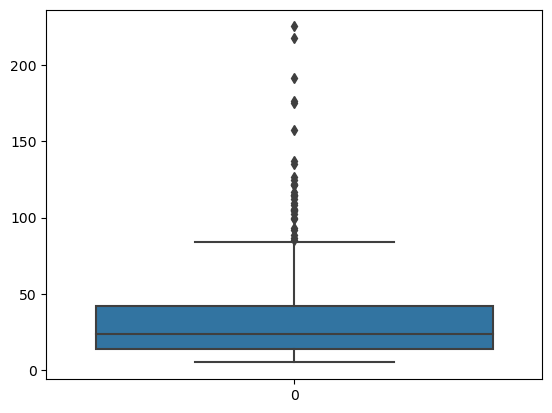

In [40]:
# visualiser la distribution et les valeurs aberrantes de prix par boxplot
sns.boxplot(weberpliaison2['price'])

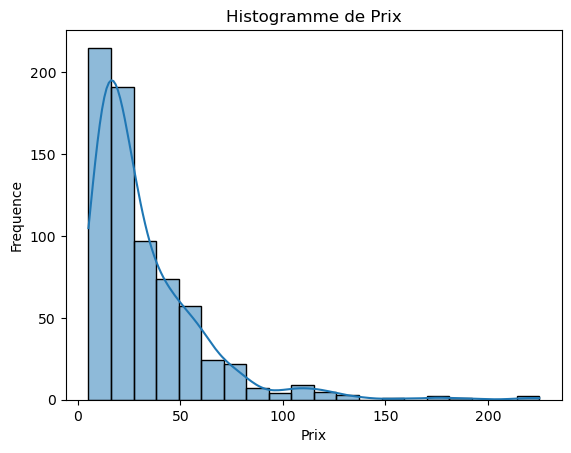

In [41]:
# un autre vision par histogramme
sns.histplot(data=weberpliaison2, x='price', bins=20, kde=True)

# Ajoutez des étiquettes et un titre
plt.xlabel('Prix')
plt.ylabel('Frequence')
plt.title('Histogramme de Prix')

# Affichez l'histogramme
plt.show()

In [42]:
# déterminer les  seuils supérieure et inferieur  en utilisant la méthode des "moustaches".
prix= weberpliaison2['price']
prix = sorted(prix)
q1,q3= np.percentile(prix,[25,75])
iqr = q3 - q1
trait_inferieur = q1 -(1.5 * iqr)
trait_superieur = q3 +(1.5 * iqr)

In [43]:
#compter le nombre des lignes où la valeur de la colonne "price" est supérieure à la seuil supérieure 

len(weberpliaison2.loc[weberpliaison2.price>trait_superieur])

32

In [44]:
print("La limite supérieure est :", trait_superieur)


La limite supérieure est : 84.28750000000001


# méthode Z-score

In [ ]:

# Calculer la moyenne et l'écart-type de la colonne 'price'
mean_price = weberpliaison2['price'].mean()
std_dev_price = weberpliaison2['price'].std()

# Calculer les scores Z pour chaque valeur de la colonne 'price'
weberpliaison2['Z_score'] = (weberpliaison2['price'] - mean_price) / std_dev_price

# Déterminer un seuil pour considérer une valeur comme aberrante (par exemple, un Z-score supérieur à 3)
seuil_aberrant = 3
# source: https://docs.oracle.com/cloud/help/fr/pbcs_common/PFUSU/insights_metrics_Z-Score.htm#PFUSU-GUID-640CEBD1-33A2-4B3C-BD81-EB283F82D879
# Sélectionner les lignes où le Z-score est supérieur au seuil
valeurs_aberrantes = weberpliaison2[weberpliaison2['Z_score'] > seuil_aberrant]

# Affichez les valeurs aberrantes
print("Valeurs aberrantes dans la colonne 'price':")
print(valeurs_aberrantes)


In [46]:
# Calculez le nombre de lignes où le Z-score est supérieur au seuil
nombre_de_lignes_aberrantes = len(valeurs_aberrantes)

# Affichez le nombre de lignes avec des Z-scores supérieurs au seuil
print("Nombre de lignes avec des Z-scores supérieurs au seuil :", nombre_de_lignes_aberrantes)

Nombre de lignes avec des Z-scores supérieurs au seuil : 14


In [47]:
# On a le Z-score (3) et  la moyenne (mean_price) et l'écart-type (std_dev_price)
Z_score = 3

# Calculer la valeur de "price" correspondant au Z-score
price_correspondant = Z_score * std_dev_price + mean_price

print("La valeur de 'price' correspondant à un Z-score de 3 est :", price_correspondant)


La valeur de 'price' correspondant à un Z-score de 3 est : 115.92471202187315
